Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jan Kranjec"
COLLABORATORS = ""

---

# Domača naloga 6: Geometrijska kalibracija kamere

1. Napišite funkcijo, ki za dane optimalne parametre geometrijske kalibracije `iPar` normalizira zajeto sliko `iImage` v metrični prostor:
```python
    def geomCalibImage( iPar, iImage, iCoorX, iCoorY ):
        return oImage
```
kjer spremenljivki `iCoorX` in `iCoorY` predstavljata koordinate točk $(x,y)$ **v metričnem prostoru**, ki jih je potrebno preslikati v prostor slike in določiti pripadajoče sivinske vrednosti. Funkcija vrne kalibrirano sliko `oImage`, katere dimenzije so podane glede na dimenzije vzorčnih točk $(x,y)$.

 Preverite delovanje funkcije tako, da vzorčne točke $(x,y)$ preslikate z optimalnimi parametri projektivne preslikave in modela radialnih distorzij. Predpostavite, da ima stranica kvadratnega polja kalibracijskega objekta dolžino 20 mm in ustvarite točke $(x,y)$ tako, da bo na izhodni kalibrirani sliki `oImage` velikost slikovnih elementov enaka $1/5\,$ mm. Izvedite geometrijsko kalibracijo slike `data/calibration-object.jpg` tako, da s funkcijo za interpolacijo prvega reda `scipy.interpolate.interpn()` v preslikanih točkah poiščete nove sivinske vrednosti. Prikažite preslikano sliko, v kateri morajo biti vzorci v kalibru poravnani z osmi slike.

Naložite module in prilepite zahtevane funkcije iz vaj:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as im
from scipy.interpolate import interpn
from scipy.interpolate import RectBivariateSpline

# Nalozi sliko
def loadImage(iPath):
    oImage = np.array(im.open(iPath))
    return oImage

# Prikazi sliko
def showImage(iImage, iTitle=''):
    plt.figure()
    plt.imshow(iImage, cmap = 'gray')
    plt.suptitle(iTitle)
    plt.xlabel('x')
    plt.ylabel('y')
    
# Pretvori v sivinsko sliko
def colorToGray(iImage):
    dtype = iImage.dtype
    r = iImage[:,:,0].astype('float')
    g = iImage[:,:,1].astype('float')
    b = iImage[:,:,2].astype('float')
    
    return (r*0.299 + g*0.587 + b*0.114).astype(dtype)

def addHomCoord2D(iPts):
    if iPts.shape[-1] == 3:
        return iPts
    iPts = np.hstack((iPts, np.ones((iPts.shape[0], 1))))
    return iPts

def mapAffineApprox2D(iPtsRef, iPtsMov):
    """Afina aproksimacijska poravnava"""
    iPtsRef = np.matrix(iPtsRef) 
    iPtsMov = np.matrix(iPtsMov) 
    # po potrebi dodaj homogeno koordinato
    iPtsRef = addHomCoord2D(iPtsRef)
    iPtsMov = addHomCoord2D(iPtsMov)
    # afina aproksimacija (s psevdoinverzom)
    iPtsRef = iPtsRef.transpose()
    iPtsMov = iPtsMov.transpose()            
    # psevdoinverz
    #oMat2D = np.dot(iPtsRef, np.linalg.pinv(iPtsMov))        
    # psevdoinverz na dolgo in siroko:
    oMat2D = iPtsRef * iPtsMov.transpose() * \
    np.linalg.inv( iPtsMov * iPtsMov.transpose() )
    return oMat2D

def transProjective2D( iPar, iCoorX, iCoorY ):
    """Funkcija za projektivno preslikavo"""
    iPar = np.asarray(iPar)
    iCoorX = np.asarray(iCoorX)
    iCoorY = np.asarray(iCoorY)
    if np.size(iCoorY) != np.size(iCoorX):
        print("Stevio X in Y koordinat razlicno!")
        
    # izvedi projektivno rpeslikava
    # iPar = [a11, a12, tx, a21, a22, ty, px, py]
    oDenom = iPar[6] * iCoorX + iPar[7] * iCoorY + 1
    oCoorU = iPar[0] * iCoorX + iPar[1] * iCoorY + iPar[2]
    oCoorV = iPar[3] * iCoorX + iPar[4] * iCoorY + iPar[5]
    
    # vrni preslikane tocke
    return oCoorU/oDenom, oCoorV/oDenom




Implementirajte funkcijo `geomCalibImage`:

In [16]:

def geomCalibImage(iPar, iImage, iCoorX, iCoorY):
    iImageG = colorToGray(iImage)
    oCoorU, oCoorV = transProjective2D(iPar, iCoorX, iCoorY)
    dy, dx = iImageG.shape
    oInterpImageG = interpn((np.arange(dy), np.arange(dx)), 
                            iImageG, 
                            (oCoorV, oCoorU), 
                            method = "linear", bounds_error=False)
    
    return oInterpImageG[0:1000,0:1400]


 Preverite delovanje funkcije tako, da vzorčne točke $(x,y)$ preslikate z optimalnimi parametri projektivne preslikave in modela radialnih distorzij. Predpostavite, da ima stranica kvadratnega polja kalibracijskega objekta dolžino 20 mm in ustvarite točke $(x,y)$ tako, da bo na izhodni kalibrirani sliki `oImage` velikost slikovnih elementov enaka $1/5\,$ mm. Izvedite geometrijsko kalibracijo slike `data/calibration-object.jpg` tako, da s funkcijo za interpolacijo prvega reda `scipy.interpolate.interpn()` v preslikanih točkah poiščete nove sivinske vrednosti. Prikažite preslikano sliko, v kateri morajo biti vzorci v kalibru poravnani z osmi slike.

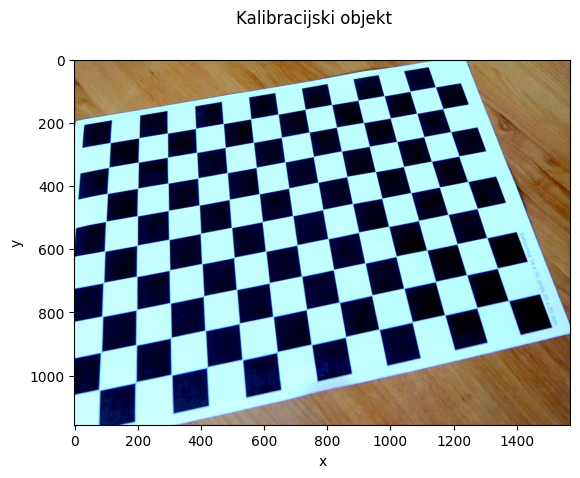

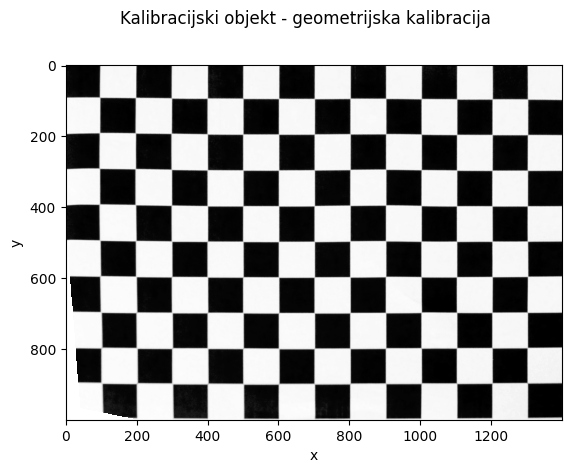

In [17]:
# Primer parametrov
iCalImage = loadImage('data/calibration-object.jpg')
iPar = [4.452, -0.349, 34.207, -0.709,
        3.352, 211.927, 2.459e-04, -1.348e-03,
        1963.270, 1478.125, 1.101e-03]
# YOUR CODE HERE

točke_sahovnica = np.array([(110.28629032258064, 266.0322580645163),
                            (645.2258064516128, 177.4032258064517),
                            (1151.6774193548385, 88.77419354838707),
                            (1240.3064516129032, 389.47983870967755),
                            (1373.2499999999998, 772.4838709677421),
                            (752.8467741935483, 905.4274193548388),
                            (81.79838709677418, 1054.1975806451615),
                            (94.45967741935479, 604.7217741935485)])

# Nalozimo in prikazemo slike
iCalImage = loadImage('data/calibration-object.jpg')
showImage( iCalImage, 'Kalibracijski objekt' )

iCoorX, iCoorY = np.meshgrid(range(iCalImage.shape[1]),range(iCalImage.shape[0]),sparse=False, indexing='xy')

# Predpostavite, da ima stranica kvadratnega polja kalibracijskega objekta dolžino 20 mm in ustvarite točke $(x,y)$ tako, da bo na izhodni kalibrirani sliki `oImage` velikost slikovnih elementov enaka $1/5\,$ mm.
pixelSize = 1/5
iCoorX = iCoorX * pixelSize
iCoorY = iCoorY * pixelSize

oImage = geomCalibImage( iPar, iCalImage, iCoorX, iCoorY )
showImage( oImage, 'Kalibracijski objekt - geometrijska kalibracija' )


2. Barvno sliko objekta `data/test-object.jpg`, ki je bila zajeta z istim slikovnim sistemom kot slika kalibra, kalibrirajte z referenčno geometrijsko kalibracijo tako, da bo velikost slikovnega elementa enaka $1/3\,$ mm. Prikažite kalibrirano barvno sliko in nato na merilu označite daljico med kljunoma kljunastega merila ter izračunajte njeno dolžino v mm. Preverite ali dolžina ustreza dolžini, ki je označena na kljunastem merilu.


In [ ]:
# Kalibrirajte sliko, jo prikazite in na njej oznacite tocki, 
# ki dolocata razdaljo med kljunoma
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Izracunajte in izpisite izmerejeno razdaljo med kljunoma
# YOUR CODE HERE
raise NotImplementedError()

3. Geometrijsko kalibracijo ponovite $3\times$ tako, da najprej $3\times$ ročno označite oglišča na sliki s kalibracijskim objektom `data/calibration-object.jpg`. Referenčno geometrijsko kalibracijo nato določite glede na povprečne koordinate teh oglišč. Na podlagi referenčne geometrijske kalibracije ocenite točnost geometrijske kalibracije z ročno označenimi oglišči (tiste geometrijske kalibracije, ki ste jo izračunali na vajah) v milimetrih. Od česa zavisi točnost geometrijske kalibracije?

In [ ]:
# Oznacite oglisca na sliki (vsako oglisce 3 krat)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Izracunajte povprecje oglisc in iz dobljenih povprecnih oglisc
# izracunajte geometrijsko kalibracijo

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Z dobljeno referencno kalibracijo ocenite tocnost 
# geometrijske kalibracije iz vaj v milimetrih

# YOUR CODE HERE
raise NotImplementedError()

Od česa zavisi točnost kalibracije?

YOUR ANSWER HERE

4. Razvijte avtomatski postopek za geometrijsko kalibracijo slikovnega sistema. S pomočjo Harrisovega detektorja oglišč iz knjižnice OpenCV (Vaja 4) poiščite oglišča na sliki kalibra `data/calibration-object.jpg`. Nato pa s funkcijo `cv2.cornerSubPix()` še dodatno izpopolnite položaj oglišč. Ustvarite idealno mrežo referenčnih oglišč in s postopkom ICP (Vaja 5) ter afino preslikavo določite korespondence z zaznanimi oglišči na sliki kalibra. Določite natančnost avtomatske v primerjavi z referenčno geometrijsko kalibracijo v mm. Poizkusite izboljšati natančnost kalibracije še tako, da avtomatsko glede na lastne pogoje zavržete korespondence, ki slabšajo kalibracijo.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

![Primer kalibracije](images/RV_7_SLO_PrimerKalibracije.png)